## Global Imports

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import joblib 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
import numpy as np


In [94]:

df = pd.read_csv("data/cleaned_amazon_reviews_final.csv")
print(f"Loaded dataset shape: {df.shape}")
print(df.head)
df.columns

Loaded dataset shape: (4385, 13)
<bound method NDFrame.head of                                                    name       asins   brand  \
0     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
3     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
4     Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
...                                                 ...         ...     ...   
4380  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4381  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4382  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4383  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY  Amazon   
4384  Fire Tablet with Alexa, 7" Display, 16 GB, Mag...  B018Y224PY 

Index(['name', 'asins', 'brand', 'categories', 'primaryCategories',
       'imageURLs', 'doRecommend', 'rating', 'text', 'sourceURLs',
       'full_review', 'label', 'clean_text'],
      dtype='object')

# Prepare the Data


In [95]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



# Train the Multinomial Naive Bayes Model

In [104]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2), max_features=10000, 
                             min_df=5, max_df=0.7)),
    ('clf', MultinomialNB())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the Model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9384264538198404



Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        35
           2       0.94      1.00      0.97       823

    accuracy                           0.94       877
   macro avg       0.31      0.33      0.32       877
weighted avg       0.88      0.94      0.91       877



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-pa

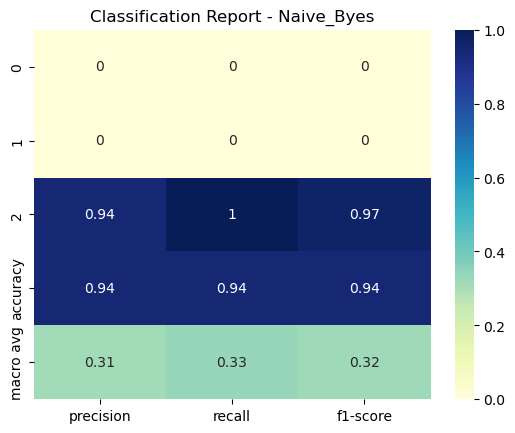

In [ ]:
print("\nClassification Report:")  
print(classification_report(y_test, y_pred))

from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap='YlGnBu')
plt.title('Classification Report - Naive_Byes')
plt.show()

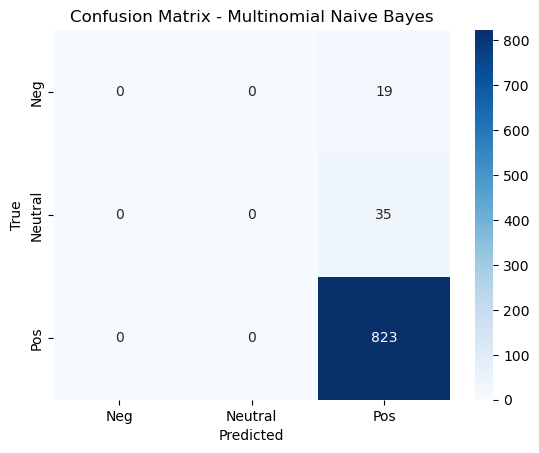

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Neg', 'Neutral', 'Pos'],
            yticklabels=['Neg', 'Neutral', 'Pos'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.title('Confusion Matrix - Multinomial Naive Bayes')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        35
           2       0.94      1.00      0.97       823

    accuracy                           0.94       877
   macro avg       0.31      0.33      0.32       877
weighted avg       0.88      0.94      0.91       877



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:

joblib.dump(pipeline, 'data/sentiment_pipeline_Naive_Bayes.joblib')
print("✅ Pipeline saved as sentiment_pipeline_Naive_Bayes.joblib")

✅ Pipeline saved as sentiment_pipeline_Naive_Bayes.joblib
